In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Exploring the database

Import relevant packages and increase the display length when printing using `pandas` to `160`:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.width = 160

## Reading the data

Read the `pickle` file which contains the database and show the first elements of the dataframe:

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/ALCE/SPE_Database.pkl')
df.head()

If your data is in another format, you can use other reading methods from the `pandas` library. For instance, if your data was in an Excel spreadsheet, you can use the `pd.read_excel` method to read your data and use it as an input to the neural network.

## Viewing the data

The `df.describe()` method gives some insight in the range of values and the distribution of numerical data. You can also explore the dataset by printing `df.columns`, which will show the name of all of the dataframe's columns and exploring the values of each column.

In [ ]:
df.describe()

,rho_l,rho_g,mu_l,mu_g,sigma,D,roughness,cos_angle,sin_angle,L_over_D,v_sl,v_sg,flow_pattern_code,barnea_flow_pattern_code
count,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,1.141000e+04,1.141000e+04,11410.000000,3549.000000,11410.000000,11410.000000,11410.000000,11410.000000
mean,965.459415,4.187905,0.061582,0.000140,2.572219,0.046196,1.596845e-07,7.629410e-01,0.148996,393.781016,0.748796,6.943439,3.902892,3.926293
std,79.983847,10.933789,0.338310,0.001452,19.819798,0.031536,5.421214e-07,3.848297e-01,0.497656,321.374626,1.178479,12.973774,1.475080,1.393014
min,700.500000,1.120000,0.000325,0.000003,0.013400,0.011680,0.000000e+00,6.123234e-17,-1.000000,46.000000,0.000274,0.009311,0.000000,0.000000
25%,886.423228,1.701092,0.001000,0.000015,0.032000,0.025000,0.000000e+00,6.427876e-01,0.000000,83.461538,0.040000,0.383649,3.000000,3.000000
50%,1000.000000,1.800000,0.001000,0.000015,0.070000,0.050400,0.000000e+00,9.961947e-01,0.000000,275.132275,0.214619,2.000975,5.000000,5.000000
75%,1000.000000,1.800000,0.003218,0.000018,0.070000,0.051000,0.000000e+00,1.000000e+00,0.258819,600.000000,1.000000,9.699684,5.000000,5.000000
max,1219.968957,102.500000,5.000000,0.017000,238.070000,0.200000,2.000000e-06,1.000000e+00,1.000000,931.000000,10.366300,200.609756,5.000000,5.000000


The `Series.value_counts()` method counts the number of times a given value is present in a dataframe. For our database, the following cell counts the number of examples of a given study. It is seen that the data from Shoham is very significant in this database, with more than 5000 examples, which represents roughly $47\%$ of the data.

In [ ]:
df['author'].value_counts()

Shoham (1982)                                                 5414
Kokal (1987)                                                  1205
Foletti, Farise, Grassi, Strazza,Lancini and Poesio (2011)     597
Andritso (1986)                                                533
Abduvayt (2003)                                                443
Tengesdal, Kaya, Sarica (1999)                                 369
Brito (2012)                                                   346
Wong and Yau (1997)                                            278
Manabe (2001)                                                  247
Sujumnong (1997)                                               232
Robert Wilkens (1997)                                          204
Gokcal (2005)                                                  183
Meng (1999)                                                    153
Piu-Yan, Liu_LD (1985)                                         141
Shazia Farman Ali (2009)                                      

In [ ]:
df['author'].value_counts()/len(df)

Shoham (1982)                                                 0.474496
Kokal (1987)                                                  0.105609
Foletti, Farise, Grassi, Strazza,Lancini and Poesio (2011)    0.052323
Andritso (1986)                                               0.046713
Abduvayt (2003)                                               0.038826
Tengesdal, Kaya, Sarica (1999)                                0.032340
Brito (2012)                                                  0.030324
Wong and Yau (1997)                                           0.024365
Manabe (2001)                                                 0.021648
Sujumnong (1997)                                              0.020333
Robert Wilkens (1997)                                         0.017879
Gokcal (2005)                                                 0.016039
Meng (1999)                                                   0.013409
Piu-Yan, Liu_LD (1985)                                        0.012358
Shazia

Similarly, the number of points of each flow pattern can be computed usind the `value_counts` method.

In [ ]:
df['flow_pattern_code'].value_counts()

5    6024
4    1948
3    1512
1     916
2     584
0     426
Name: flow_pattern_code, dtype: int64

In [ ]:
df['flow_pattern_name'].value_counts()

Intermittent         6024
Annular              1948
Stratified Wavy      1512
Dispersed Bubble      916
Stratified Smooth     584
Bubble Flow           426
Name: flow_pattern_name, dtype: int64

The cell below plots values of the variables selected in `columns` groupped by the `author` field. It is possible to check which variables were studied for each author. This is done by using a `boxplot`.

------------------------------------------------------------------------------------------------------------------------
v_sl
                                                     count  ...        max
author                                                      ...           
Abdul-Majeed (1995)                                   88.0  ...   1.825000
Abduvayt (2003)                                      443.0  ...   6.475590
Andritso (1986)                                      533.0  ...   0.335006
Brito (2012)                                         346.0  ...   2.960593
Costigan and Whalley (1996)                           94.0  ...   0.960000
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...   2.370000
Gokcal (2005)                                        183.0  ...   1.760000
Jackman (1992)                                        50.0  ...   0.317490
Kaji, Azzopardi and Lucas (2009)                      85.0  ...   1.610580
Kokal (1987)                                     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


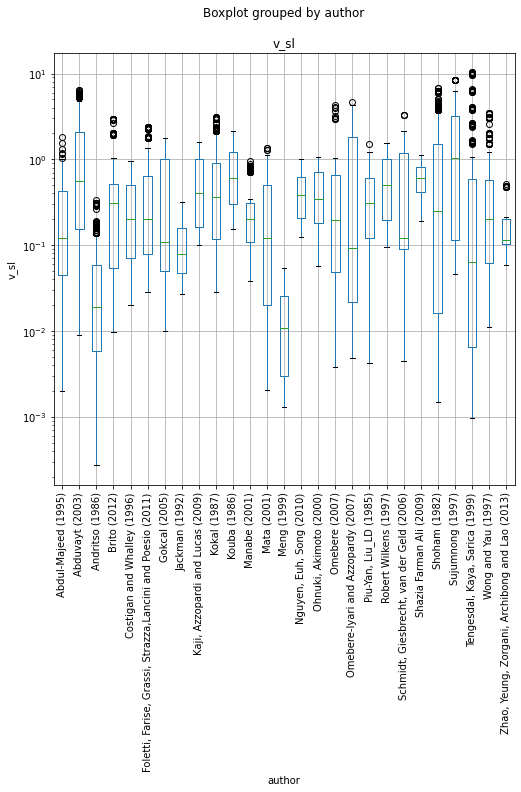

------------------------------------------------------------------------------------------------------------------------
v_sg
                                                     count  ...         max
author                                                      ...            
Abdul-Majeed (1995)                                   88.0  ...   48.908000
Abduvayt (2003)                                      443.0  ...   11.095900
Andritso (1986)                                      533.0  ...  157.740096
Brito (2012)                                         346.0  ...    7.737667
Costigan and Whalley (1996)                           94.0  ...   37.340000
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...    1.160000
Gokcal (2005)                                        183.0  ...   20.300000
Jackman (1992)                                        50.0  ...   42.964000
Kaji, Azzopardi and Lucas (2009)                      85.0  ...   19.013800
Kokal (1987)                          

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


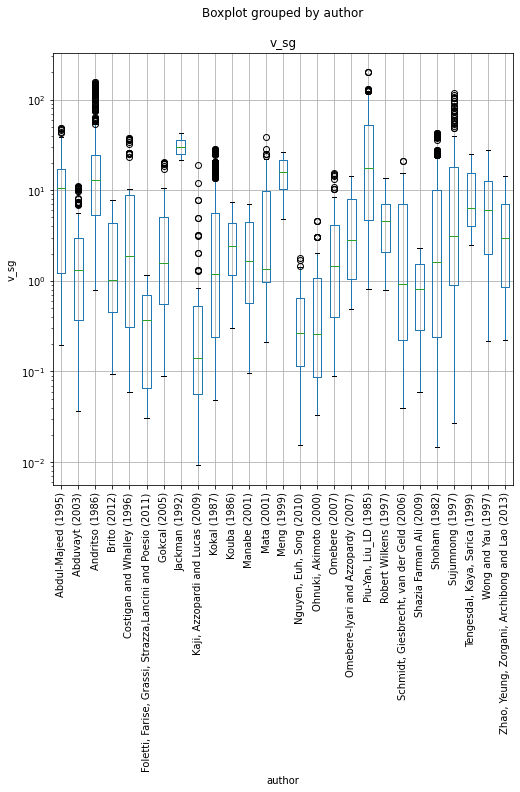

------------------------------------------------------------------------------------------------------------------------
rho_l
                                                     count  ...          max
author                                                      ...             
Abdul-Majeed (1995)                                   88.0  ...   804.825208
Abduvayt (2003)                                      443.0  ...  1000.000000
Andritso (1986)                                      533.0  ...  1219.968957
Brito (2012)                                         346.0  ...   870.194293
Costigan and Whalley (1996)                           94.0  ...  1000.000000
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...   998.000000
Gokcal (2005)                                        183.0  ...   885.000000
Jackman (1992)                                        50.0  ...   998.200000
Kaji, Azzopardi and Lucas (2009)                      85.0  ...   998.200000
Kokal (1987)              

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


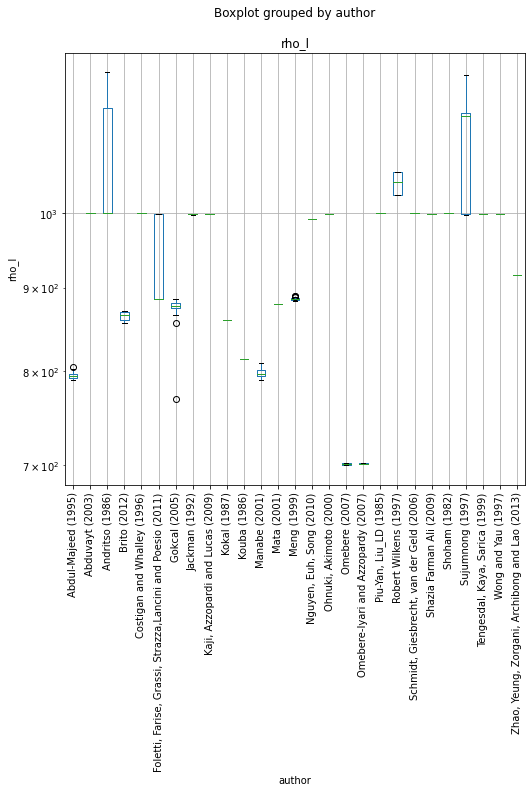

------------------------------------------------------------------------------------------------------------------------
rho_g
                                                     count  ...         max
author                                                      ...            
Abdul-Majeed (1995)                                   88.0  ...   10.082796
Abduvayt (2003)                                      443.0  ...   23.442900
Andritso (1986)                                      533.0  ...    2.348312
Brito (2012)                                         346.0  ...    2.483907
Costigan and Whalley (1996)                           94.0  ...    1.200000
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...    1.800000
Gokcal (2005)                                        183.0  ...    4.500000
Jackman (1992)                                        50.0  ...    1.720400
Kaji, Azzopardi and Lucas (2009)                      85.0  ...    1.225000
Kokal (1987)                         

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


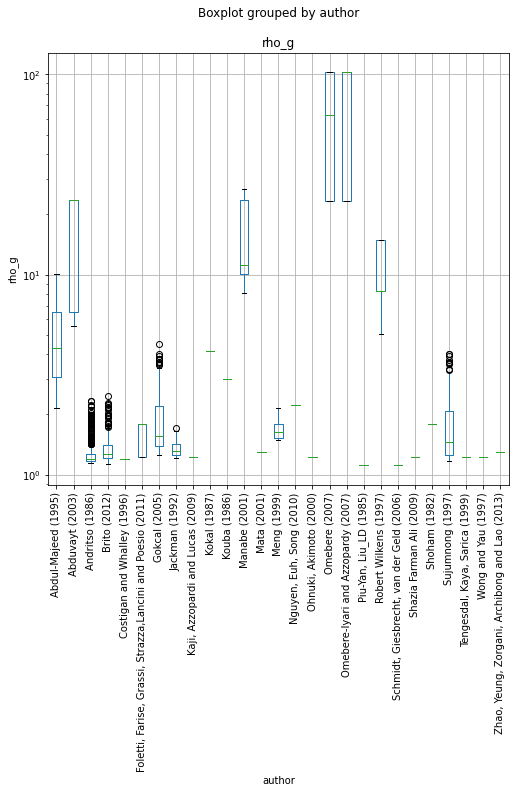

------------------------------------------------------------------------------------------------------------------------
mu_l
                                                     count  ...       max
author                                                      ...          
Abdul-Majeed (1995)                                   88.0  ...  0.001983
Abduvayt (2003)                                      443.0  ...  0.001000
Andritso (1986)                                      533.0  ...  0.080000
Brito (2012)                                         346.0  ...  0.165883
Costigan and Whalley (1996)                           94.0  ...  0.001000
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...  0.896000
Gokcal (2005)                                        183.0  ...  0.601276
Jackman (1992)                                        50.0  ...  0.001002
Kaji, Azzopardi and Lucas (2009)                      85.0  ...  0.001003
Kokal (1987)                                        1205.0  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


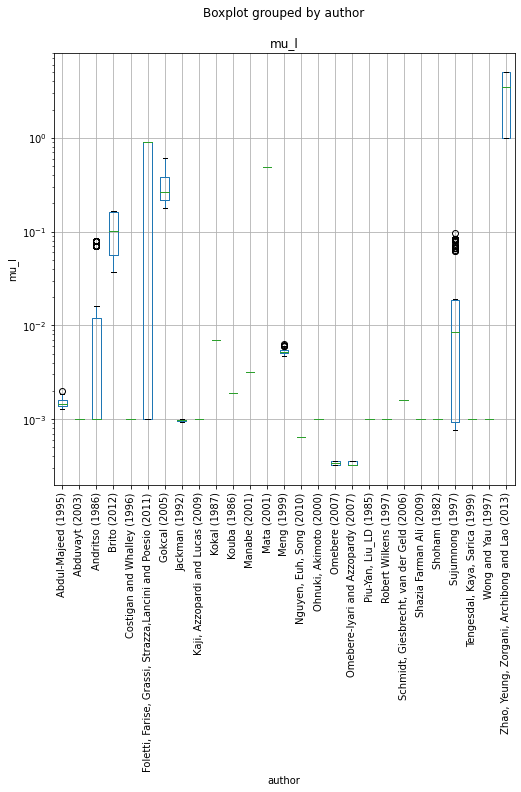

------------------------------------------------------------------------------------------------------------------------
mu_g
                                                     count  ...       max
author                                                      ...          
Abdul-Majeed (1995)                                   88.0  ...  0.000018
Abduvayt (2003)                                      443.0  ...  0.000003
Andritso (1986)                                      533.0  ...  0.000018
Brito (2012)                                         346.0  ...  0.000010
Costigan and Whalley (1996)                           94.0  ...  0.000018
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...  0.000018
Gokcal (2005)                                        183.0  ...  0.000015
Jackman (1992)                                        50.0  ...  0.000018
Kaji, Azzopardi and Lucas (2009)                      85.0  ...  0.000018
Kokal (1987)                                        1205.0  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


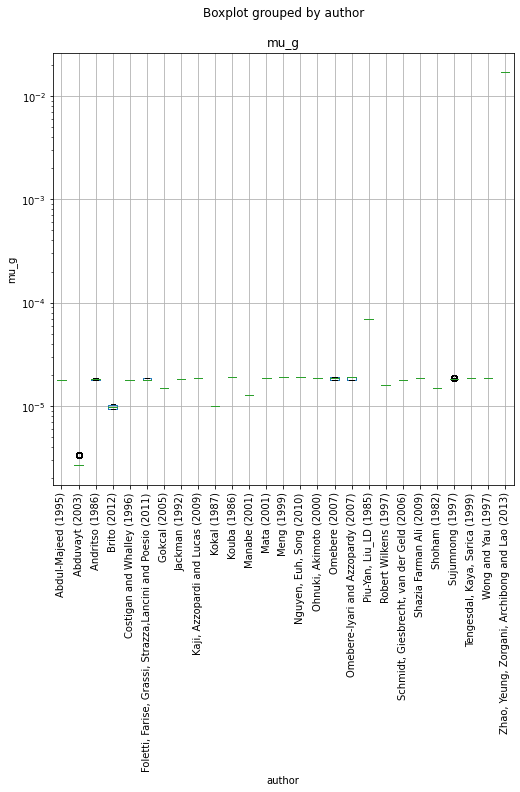

------------------------------------------------------------------------------------------------------------------------
D
                                                     count  ...      max
author                                                      ...         
Abdul-Majeed (1995)                                   88.0  ...  0.05080
Abduvayt (2003)                                      443.0  ...  0.10640
Andritso (1986)                                      533.0  ...  0.09525
Brito (2012)                                         346.0  ...  0.05040
Costigan and Whalley (1996)                           94.0  ...  0.03200
Foletti, Farise, Grassi, Strazza,Lancini and Po...   597.0  ...  0.02200
Gokcal (2005)                                        183.0  ...  0.05040
Jackman (1992)                                        50.0  ...  0.05030
Kaji, Azzopardi and Lucas (2009)                      85.0  ...  0.05230
Kokal (1987)                                        1205.0  ...  0.05120
K

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


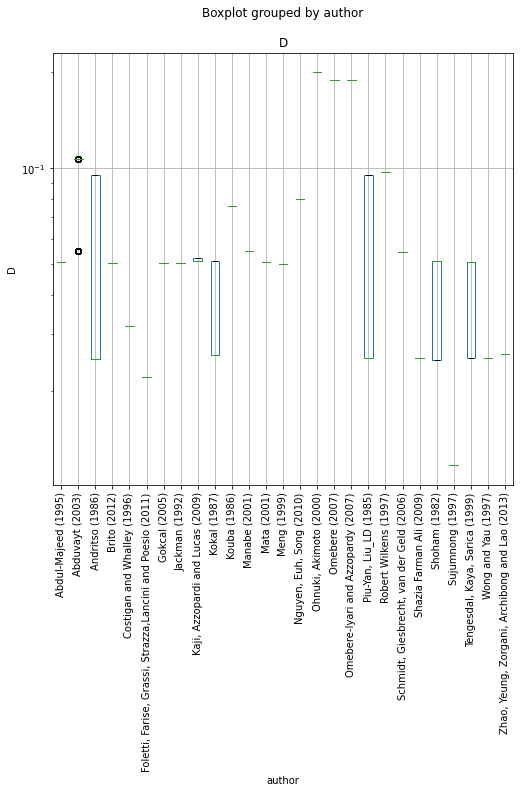

In [ ]:
columns = ['v_sl', 'v_sg', 'rho_l', 'rho_g', 'mu_l', 'mu_g', 'D']
figsize = (8, 8)

for c in columns:
    print('-'*120 + f'\n{c}')
    print(df.groupby('author')[c].describe(percentiles=[]))
    
    fig, ax = plt.subplots(figsize=figsize)
    df.boxplot(by='author', column=c, rot=90, ax=ax)
    ax.set_yscale('log')
    ax.set_ylabel(c)
    plt.show()

Histograms are easy to plot as well using the `pandas` library. The cells below show the liquids and gases present in the database and their frequency.

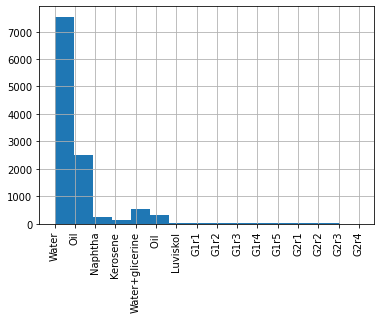

In [ ]:
df['liquid'].hist(xrot=90, bins=len(df.liquid.unique()))

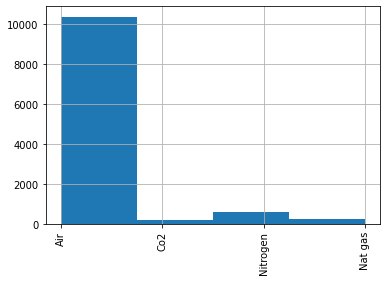

In [ ]:
df['gas'].hist(xrot=90, bins=len(df.gas.unique()))

As a last example of exploring the dataset, the points are grouped by the `author` and `flow_pattern_name` fields and the number of points in this subgroup of the dataframe is printed. For instance, it can be seen that `Abdul-Majeed (1995)` has 22 points with an `Annular` flow pattern. Also, it only has 4 different flow patterns as it does not have any points with `Dispersed Bubble` or `Bubble Flow`.

In [ ]:
 for i, df_sub in df.groupby(['author', 'flow_pattern_name']):
        print(f'{i[0][0:20]:20} - {i[1][0:20]:20}: {len(df_sub)}')

Abdul-Majeed (1995)  - Annular             : 22
Abdul-Majeed (1995)  - Intermittent        : 33
Abdul-Majeed (1995)  - Stratified Smooth   : 20
Abdul-Majeed (1995)  - Stratified Wavy     : 13
Abduvayt (2003)      - Annular             : 8
Abduvayt (2003)      - Dispersed Bubble    : 88
Abduvayt (2003)      - Intermittent        : 277
Abduvayt (2003)      - Stratified Wavy     : 70
Andritso (1986)      - Annular             : 87
Andritso (1986)      - Intermittent        : 44
Andritso (1986)      - Stratified Smooth   : 56
Andritso (1986)      - Stratified Wavy     : 346
Brito (2012)         - Annular             : 6
Brito (2012)         - Dispersed Bubble    : 20
Brito (2012)         - Intermittent        : 251
Brito (2012)         - Stratified Smooth   : 31
Brito (2012)         - Stratified Wavy     : 38
Costigan and Whalley - Annular             : 15
Costigan and Whalley - Bubble Flow         : 10
Costigan and Whalley - Dispersed Bubble    : 11
Costigan and Whalley - Intermittent    

It can be seen that the dataset covers a wide range of values for some variables (e.g. `v_sl`, `v_sg`), while other variables are underrepresented. This is not a problem if the `model` is being used to `predict` values in a range similar to what is present in the database.

# Data Splitting

There are many strategies in splitting the database into training, validation and testing datasets. In here, we will present the most simple one of randomly sampling points from the original dataset. A seed is given to ensure repeatibility between different runs of the split and make sure that the points in the test dataset are not involved in the improovement of the `model`.

In [ ]:
import numpy as np
import random
random.seed(42)

It is easy to sample a given frequency using the `.sample` method. Here, `df` is sampled and $60\%$ of the points fo to `df_train`. Then, a dataframe with the remaining points is obtained by dropping the points in `df_train` from `df` using the command `df.drop(df_train.index)`. $50\%$ of these points are randomly sampled and go to `df_val`, while the remaining points which are not in `df_train` or `df_val` go to `df_test`.

In [ ]:
df_train = df.sample(frac=0.6, random_state=42)
df_val = df.drop(df_train.index).sample(frac=0.5, random_state=42)
df_test = df.drop(df_train.index).drop(df_val.index)

As a check of the code above, we can check the lengths of each dataframe.

In [ ]:
N_points = [len(df_train), len(df_val), len(df_test)]
print(N_points)
print(sum(N_points), len(df))

[6846, 2282, 2282]
11410 11410


To check if there is an intersection of the data in `df_train`, `df_val` and `df_test`, the `merge` method can be used. The cell below shows that there is no intersection between `df_train` and `df_val`.

In [ ]:
pd.merge(df_train, df_val, how='inner', on=df.columns.to_list())

,test_number,author,liquid,gas,rho_l,rho_g,mu_l,mu_g,sigma,D,roughness,cos_angle,sin_angle,L_over_D,v_sl,v_sg,flow_pattern,flow_pattern_code,barnea_flow_pattern_code,flow_pattern_name


# Neural Networks

The neural networks can be implemented very easily by using the `keras` API for tensorflow. First, let's import all relevant objects.

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback

It is good to have some kind of feedback during training to make sure the code is running (at least in the first few iterations). Since our dataset is very small, printing at every `epoch` will be too frequent, so the following `class` is created and will be used as a `Callback` in the `model.fit` method. At the end of each epoch (hence the use of `on_epoch_end`), by using this callback, the code will print the desired information only if `epoch` is divisible by `N`. 

In [ ]:
class PrintEveryNEpochs(Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N
    def on_epoch_end(self, epoch, logs=None):
        if (epoch % self.N) == 0:
            print(
            "Epoch {:6}: Train loss: {:12.8f} Validation loss: {:12.8f} Accuracy: {:6.3f} Validation Accuracy: {:6.3f}"
            .format(epoch, logs["loss"], logs["val_loss"], logs['accuracy'], logs['val_accuracy'])
            )

## Selection of inputs and outputs and preprocessing

The `inputs` and `output` variables are lists of the desired inputs and outputs for the neural network. Specifically, these lists contain the name of the columns of `df` which should be used to get input and output values, respectively.

In [ ]:
df.columns

Index(['test_number', 'author', 'liquid', 'gas', 'rho_l', 'rho_g', 'mu_l', 'mu_g', 'sigma', 'D', 'roughness', 'cos_angle', 'sin_angle', 'L_over_D', 'v_sl',
       'v_sg', 'flow_pattern', 'flow_pattern_code', 'barnea_flow_pattern_code', 'flow_pattern_name'],
      dtype='object')

In [ ]:
inputs = ['rho_l', 'rho_g', 'mu_l', 'mu_g', 'sigma', 'D', 'sin_angle', 'cos_angle', 'v_sl', 'v_sg']
output = ['flow_pattern_code']

It is a good practice to normalize the data so that it is in a nice numerical range and the values are more significant at first sight. This also gives some intuition for the neural network, as a negative value represents a low value in comparison with the dataset, while a given value (e.g. 800 kg/m$^3$) has no immediately obvius significance for the neural network. This is done by using the `scaler` class from `sklearn`. Notice that the normalization is fitted using `df_train` and the transformation is performed on `df_val` and `df_test` using the values obtained from `df_train`. This is important, as it prevent that data coming from `df_test` and `df_val` to be implictly transfered to `df_train`, contaminating the data.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[inputs].values)
X_val, X_test = scaler.transform(df_val[inputs].values), scaler.transform(df_test[inputs].values)

We can check that scaling was successful by evaluating the mean and standard deviation of the resulting `X`s. Notice that the `mean` values for the training dataset are on the order of the machine precision, while the values for validation and training are not exactly zero.

In [ ]:
X_train.mean(axis=0), X_val.mean(axis=0), X_test.mean(axis=0)

(array([-1.33680842e-15, -5.50084210e-17,  3.73642105e-17, -3.37315789e-17,
         1.60873684e-17, -1.44267368e-16,  3.89210526e-17, -2.88534736e-16,
         1.07941052e-16, -4.51484210e-17]),
 array([ 6.38358174e-03,  3.86461406e-02, -8.37371264e-05, -1.66176839e-03,
         1.72922968e-02,  3.25190549e-02,  2.38270921e-03, -1.36388301e-02,
        -6.10736647e-03, -2.67332019e-02]),
 array([ 0.00240099,  0.00341556, -0.00267503, -0.01170737,  0.05768175,
        -0.01077998,  0.01197436, -0.03806665, -0.00698864,  0.00405558]))

Similarly, the standard deviation for each feature is `1` for the training values, while it is only close to 1 for validaiton and test datasets. This is expected, as the values are slightly different in each dataset.

In [ ]:
X_train.std(axis=0), X_val.std(axis=0), X_test.std(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.03053866, 1.1446338 , 1.03014421, 0.99040835, 1.08877553,
        1.07146389, 1.00406544, 1.01909786, 1.02292371, 0.90357136]),
 array([0.9881045 , 0.9602805 , 0.98972974, 0.93073736, 1.25107927,
        0.95988866, 1.02479216, 1.02707427, 0.99438803, 1.07024135]))

We can save the scaler for later use by using the cell below.

In [ ]:
import pickle

with open('Models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

`df[output].values` are numerical data with each value corresponding to a different flow pattern. In the neural network model, the `Y` value corresponds to the probability of that point being a given flow pattern. Since each point only has one flow pattern, the probability is `1` for that given flow pattern. Hence, we want to transform each element of the `df[output]` column from a numerical value to an array with a value of `1` for the corresponding flow pattern and `0` for the other ones. This is also known as one-hot encoding. This is done by using the 'to_categorical' function.

In [ ]:
Y_train = to_categorical(df_train[output].values)
Y_val = to_categorical(df_val[output].values)
Y_test = to_categorical(df_test[output].values)

Notice that the `Y` values now have 6 columns, corresponding to the six different flow patterns of this problem.

In [ ]:
Y_train.shape, Y_val.shape, Y_test.shape

((6846, 6), (2282, 6), (2282, 6))

In [ ]:
Y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

## Building the neural networks

With the data already split into training, validation and test and the normalizing and one-hot encoding steps completed, the model can be built. In this example, we will use batches of `64` examples, two hidden layers with `16` neurons each and the `tanh` activation function. `fname` is the name of the file where the model will be saved after training. This is useful because there is no need to train the model every time and it can be readily loaded from the file. Dropout rates of $20\%$ are used in the intermediate layers, while the last layer has a dropout rate of $50\%$. The number of epochs was selected to be high enough to obtain the learning curve.

In [ ]:
n_inputs = len(inputs)
n_flow_patterns = len(df_train.flow_pattern_code.unique())
n_batch= 64
n_hidden_layers = [16, 16]
fname = "Models/trained_model_16_16.hdf5"
fname = "Models/trained_model_16_16_dropout.hdf5"
activation_layer = 'tanh'
dropout_rate_mid = 0.2
dropout_rate_final = 0.5
n_epochs = int(50e3)

The last activation function is `'softmax'`. This is because we want to interpret the values given by the `model` as a probability for each flow pattern and this activation funtion already normalizes the outputs so they can be interpreted that way. The model is plotted to present the dataflow. A summary of the parameters and shapes is also given.

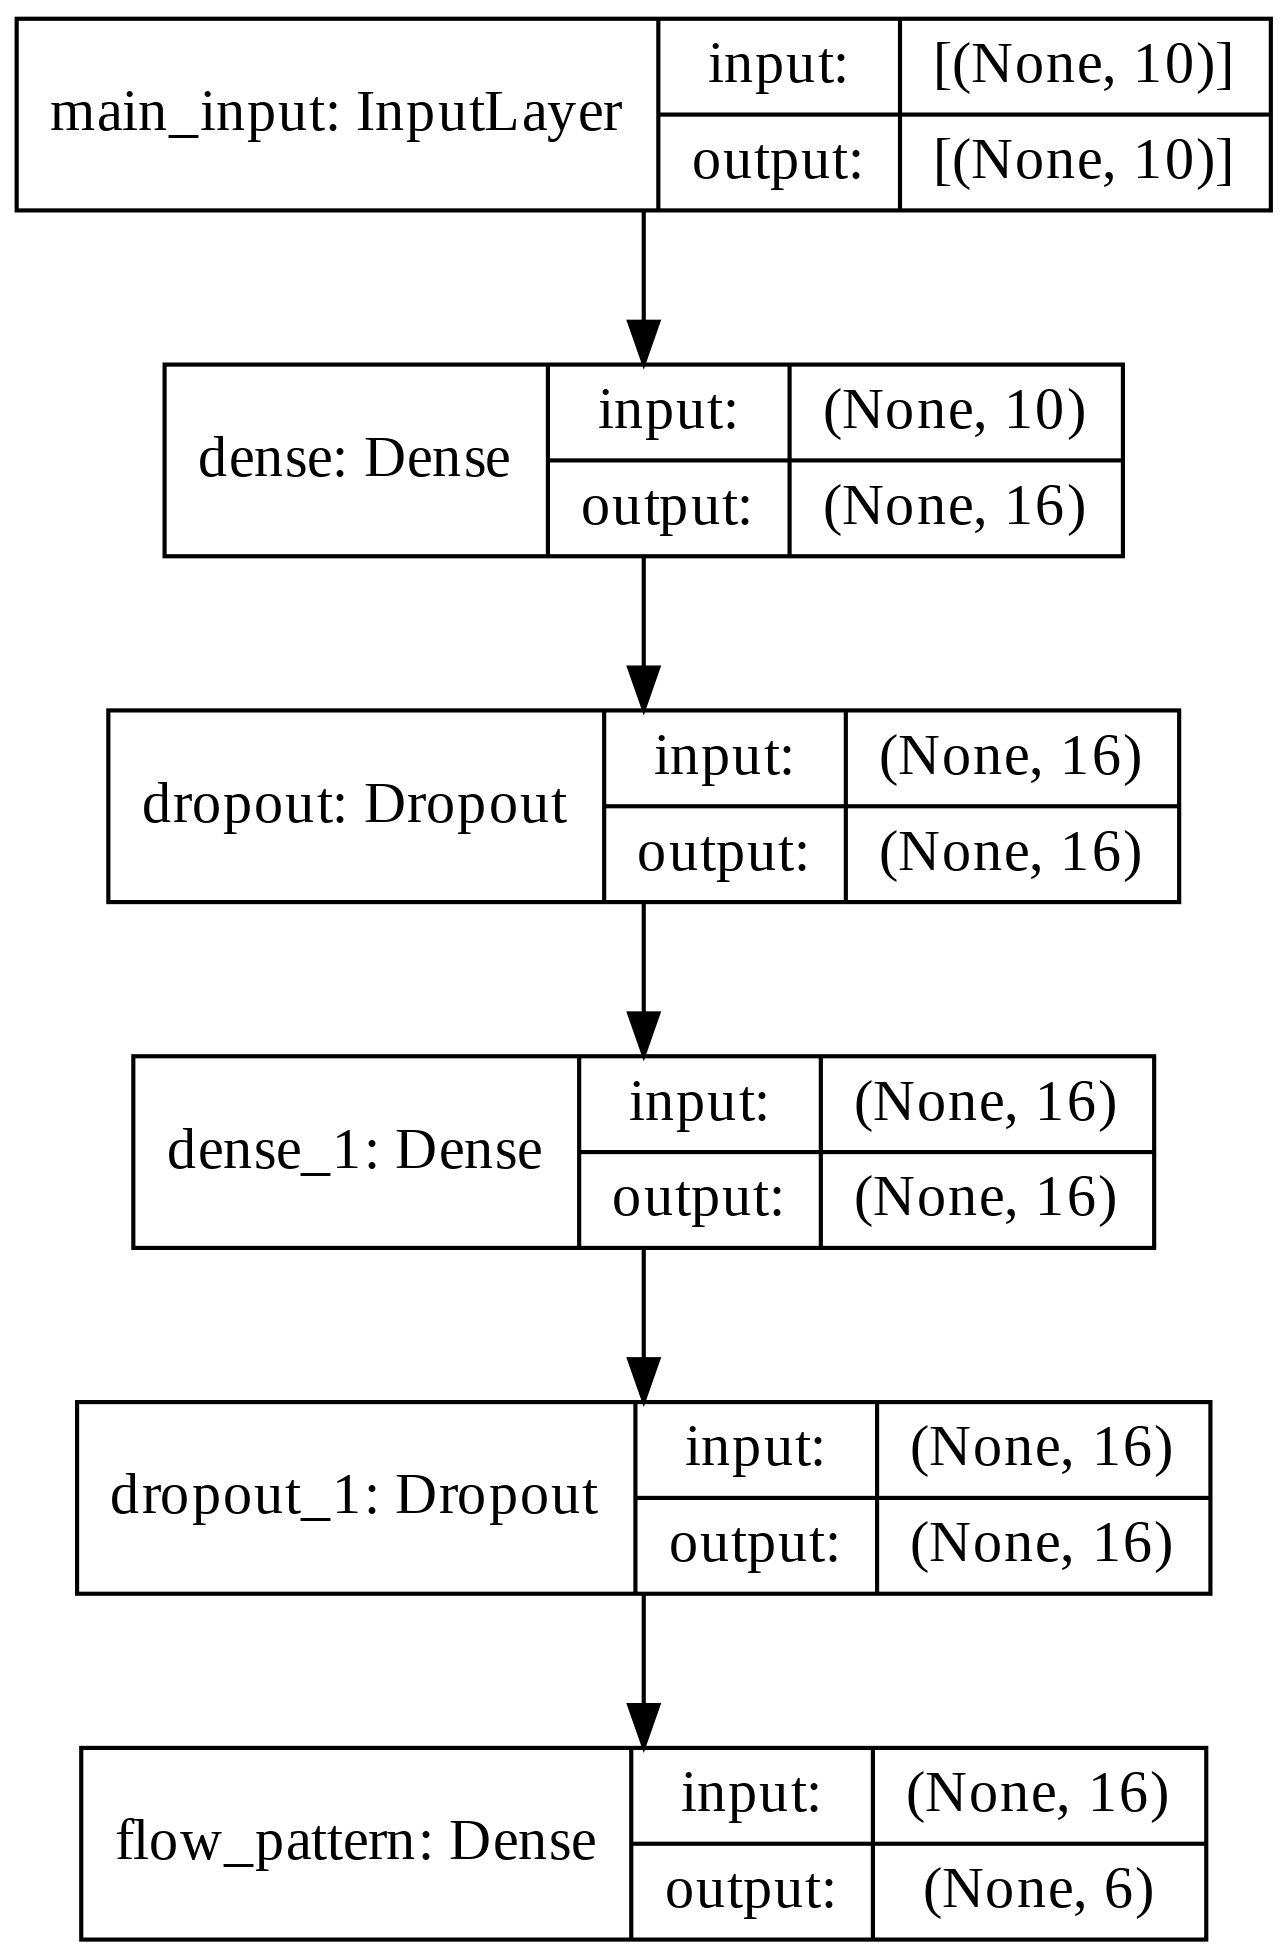

In [ ]:
main_input = Input(shape=(n_inputs,), name='main_input')
x = main_input
while len(n_hidden_layers) > 1:
    x = Dense(units=n_hidden_layers.pop(0), activation=activation_layer)(x)
    x = Dropout(dropout_rate_mid)(x)
x = Dense(units=n_hidden_layers.pop(0), activation='relu')(x)
x = Dropout(dropout_rate_final)(x)
flow_pattern = Dense(units=n_flow_patterns, activation='softmax', name='flow_pattern')(x)

#%% Model build
model = Model(inputs=[main_input], outputs=[flow_pattern])

plot_model(model, to_file='model.png', show_shapes=True, dpi=300)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
flow_pattern (Dense)         (None, 6)                 102       
Total params: 550
Trainable params: 550
Non-trainable params: 0
_______________________________________________________________

In total, this model has 550 trainable parameters. A rule of thumb in order to ensure generalization is to have 10 times more examples than the number of parameters, so this is consistent with the data budget we have. This can also be evaluated by looking at the learning curves and comparing the validation and training errors. 

## Training the network
Now we set the optimizer options and compile the model. The categorical crossentropy is used as a loss function and the accuracy is selected as a metric.

In [ ]:
adam = optimizers.Adam(1e-3)
model.compile(loss={'flow_pattern':'categorical_crossentropy',
                    },
              optimizer=adam,
              metrics={'flow_pattern':['accuracy']
                       },
             )

In [ ]:
X_train.shape, Y_train.shape

((6846, 10), (6846, 6))

The model is fitted to the data using the `model.fit` method. After training the model is saved and the history during training is kept in `history`.

In [ ]:
history = model.fit(x=X_train, y=Y_train, verbose=0, batch_size=n_batch, epochs=n_epochs,
                    validation_data=(X_val, Y_val), callbacks=[PrintEveryNEpochs(10)])
model.save(fname)

Epoch      0: Train loss:   1.61858058 Validation loss:   1.30284655 Accuracy:  0.402 Validation Accuracy:  0.563
Epoch     10: Train loss:   0.95147955 Validation loss:   0.79600853 Accuracy:  0.641 Validation Accuracy:  0.700
Epoch     20: Train loss:   0.86282283 Validation loss:   0.71940875 Accuracy:  0.663 Validation Accuracy:  0.725
Epoch     30: Train loss:   0.82857192 Validation loss:   0.67511761 Accuracy:  0.678 Validation Accuracy:  0.740
Epoch     40: Train loss:   0.81565124 Validation loss:   0.65097642 Accuracy:  0.681 Validation Accuracy:  0.746
Epoch     50: Train loss:   0.79881132 Validation loss:   0.63078558 Accuracy:  0.687 Validation Accuracy:  0.753
Epoch     60: Train loss:   0.78892487 Validation loss:   0.61660731 Accuracy:  0.691 Validation Accuracy:  0.756
Epoch     70: Train loss:   0.78793615 Validation loss:   0.60609555 Accuracy:  0.694 Validation Accuracy:  0.753
Epoch     80: Train loss:   0.77888125 Validation loss:   0.59275562 Accuracy:  0.691 Va

KeyboardInterrupt: ignored

## Optimizing hyperparameters

The `history` object is used to plot the learning curve of our model. It is seen that the validation error is still decreasing with the training error, however the training error is stagnant (although it is still decreasing slowly). This indicates that either too much regularization is being used or the model is too simple. We can improve this by either decreasing the regularization (in this case, the dropout rate) or increasing the model complexity (by increasing the number of layers or neurons). 

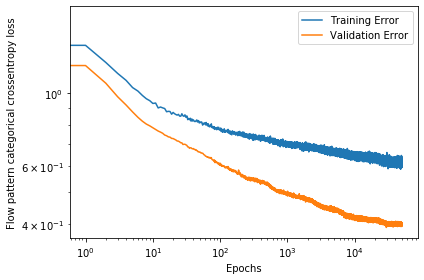

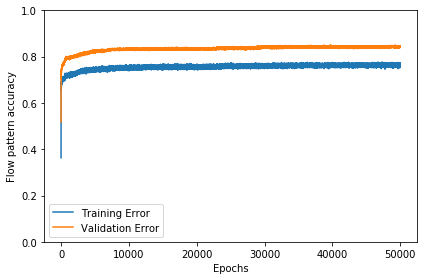

In [ ]:
fig, ax = plt.subplots()
ax.loglog(history.history['loss'], label='Training Error')
ax.loglog(history.history['val_loss'], label='Validation Error')
ax.set_xlabel("Epochs")
ax.set_ylabel("Flow pattern categorical crossentropy loss")
ax.legend()
plt.tight_layout()

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Training Error')
ax.plot(history.history['val_accuracy'], label='Validation Error')
ax.set_xlabel("Epochs")
ax.set_ylabel("Flow pattern accuracy")
ax.set_ylim([0, 1])
ax.legend()
plt.tight_layout()

The curve below is for the same model but with no dropout. It is seen that after $\approx 3x10^3$, the model starts overfitting and further training will actually result in worse results. However, it is seen that the model accuracy is higher than the previous one with dropout rate.

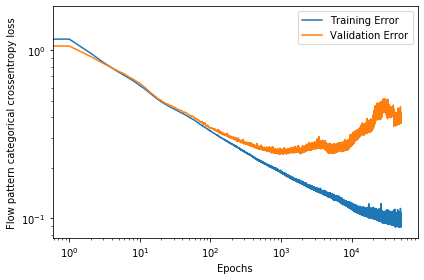

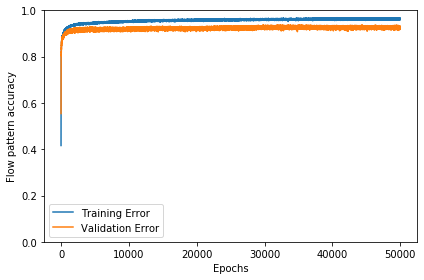

In [ ]:
fig, ax = plt.subplots()
ax.loglog(history.history['loss'], label='Training Error')
ax.loglog(history.history['val_loss'], label='Validation Error')
ax.set_xlabel("Epochs")
ax.set_ylabel("Flow pattern categorical crossentropy loss")
ax.legend()
plt.tight_layout()

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Training Error')
ax.plot(history.history['val_accuracy'], label='Validation Error')
ax.set_xlabel("Epochs")
ax.set_ylabel("Flow pattern accuracy")
ax.set_ylim([0, 1])
ax.legend()
plt.tight_layout()

This is an iterative process and the hyperparameter tuning (i.e. dropout rates, hidden layer units, etc.) can be tuned using different approaches. Let's assume that we already did this hyperparameter optimization and let's explore the `model` capabilities. First, the model is loaded from `fname` using `load_model`.

In [ ]:
model = load_model(fname)

## Using the model

The two functions below take a model, some input parameters and create a flow pattern map and flow probability as a function of the superficial velocities.

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns

fp_dict = {
    1:'Dispersed Bubble',
    2:'Stratified Smoth',
    3:'Stratified Wavy',
    4:'Annular',
    5:'Intermitent',
    0:'Bubble Flow',
}

def plot_flow_pattern(model, rho_l=1000., rho_g=1.8, mu_l=1e-3, mu_g=0.000015, sigma=0.070, D=0.051, angle=0):
        sin_angle = np.sin(angle*np.pi/180)
        cos_angle = np.cos(angle*np.pi/180)
        vsls = np.logspace(-2, 1, 300)
        vsgs = np.logspace(-2, 2, 300)
        vsls, vsgs = np.meshgrid(vsls, vsgs)
        X = np.array([
                [rho_l, rho_g, mu_l, mu_g, sigma, D, sin_angle, cos_angle, vsl, vsg]
                for (vsl, vsg) in zip(vsls.flatten(), vsgs.flatten())]
            )
        X = scaler.transform(X)
        flow_patterns = model.predict(X).argmax(axis=1)
        
        fig, ax = plt.subplots()
        cmap = ListedColormap(sns.color_palette('Paired', n_colors=6).as_hex())
        ax.contourf(vsgs, vsls, flow_patterns.reshape(vsgs.shape), cmap=cmap, vmin=0, vmax=5)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('$v_{sg}$ [m/s]')
        ax.set_ylabel('$v_{sl}$ [m/s]')
        plt.tight_layout()

def plot_flow_probability(model, cmap='RdBu', rho_l=1000., rho_g=1.8, mu_l=1e-3, mu_g=0.000015, sigma=0.070, D=0.051, angle=0):
        sin_angle = np.sin(angle*np.pi/180)
        cos_angle = np.cos(angle*np.pi/180)
        vsls = np.logspace(-2, 1, 300)
        vsgs = np.logspace(-2, 2, 300)
        vsls, vsgs = np.meshgrid(vsls, vsgs)
        X = np.array([
                [rho_l, rho_g, mu_l, mu_g, sigma, D, sin_angle, cos_angle, vsl, vsg]
                for (vsl, vsg) in zip(vsls.flatten(), vsgs.flatten())]
            )
        X = scaler.transform(X)
        flow_patterns = model.predict(X)
        fig, axes = plt.subplots(3,2, sharex=True, sharey=True, figsize=(10,10))
        for pattern_code, ax in enumerate(axes.flatten()):
            im = ax.pcolormesh(vsgs, vsls, flow_patterns[:, pattern_code].reshape(vsgs.shape),
                               vmin=0, vmax=1,
                               cmap=cmap)
            plt.colorbar(im, ax=ax)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlabel('$v_{sg}$ [m/s]')
            ax.set_ylabel('$v_{sl}$ [m/s]')
            ax.set_title(fp_dict[pattern_code])
            plt.tight_layout()

We can use this functions to plot the flow pattern map for different conditions. This is done below.

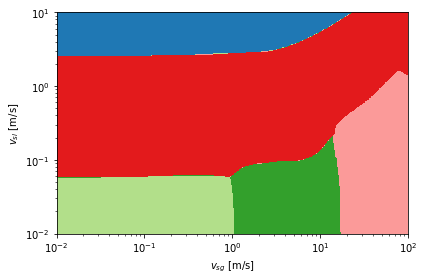

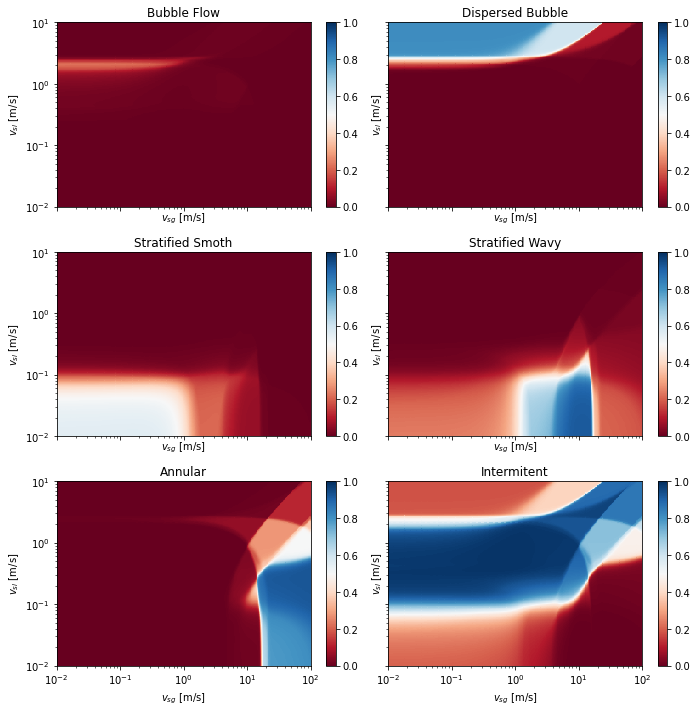

In [ ]:
plot_flow_pattern(model, angle=0)
plot_flow_probability(model, angle=0)

Notice that the probability of being stratified smooth is actually not that high in the stratified region. However, it is higher than other flow patterns, so the predicted flow pattern is stratified smooth, although with a lower confidence. This already illustrates one of the benefits of using this type of model. It also gives some kind of confidence values. Let's check the flow pattern for vertical case.

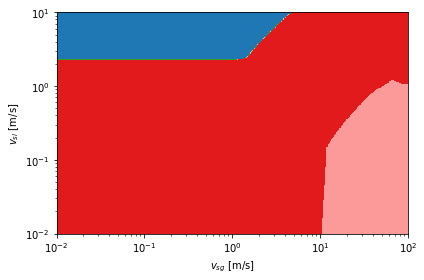

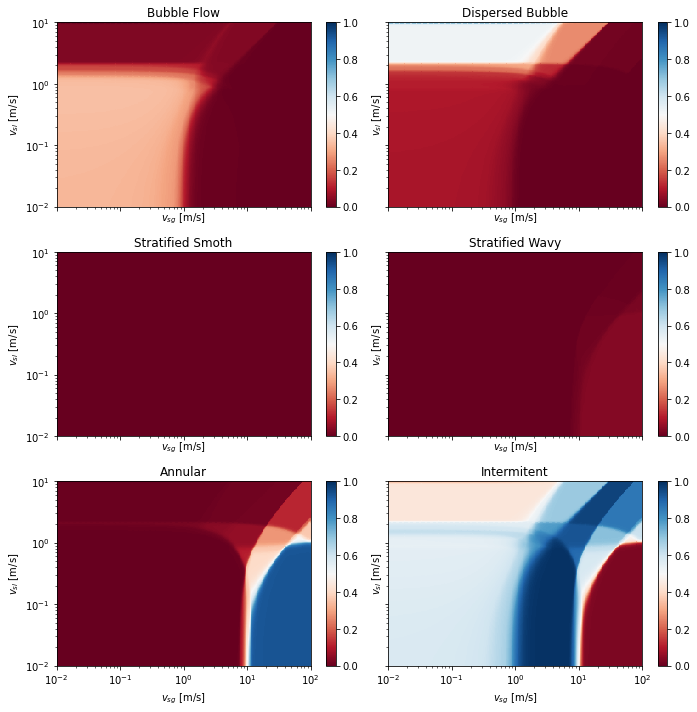

In [ ]:
plot_flow_pattern(model, angle=90)
plot_flow_probability(model, angle=90)

It is seen that in the vertical case the model predicts intermittent flow, even though it should predict bubbly flow in the region of low `v_sl` and `v_sg`. Can you think of a reason why this is the case?

Let's check the number of points for each flow pattern.

In [ ]:
df_train.flow_pattern_code.value_counts()

5    3616
4    1164
3     913
1     562
2     340
0     251
Name: flow_pattern_code, dtype: int64

In [ ]:
df_train.flow_pattern_code.value_counts()/len(df_train)

5    0.528192
4    0.170026
3    0.133363
1    0.082092
2    0.049664
0    0.036664
Name: flow_pattern_code, dtype: float64

In [ ]:
df_val.flow_pattern_code.value_counts()

5    1185
4     396
3     303
1     182
2     131
0      85
Name: flow_pattern_code, dtype: int64

In [ ]:
df_val.flow_pattern_code.value_counts()/len(df_val)

5    0.519281
4    0.173532
3    0.132778
1    0.079755
2    0.057406
0    0.037248
Name: flow_pattern_code, dtype: float64

The number of points with intermittent flow pattern represents almost $52\%$ of the dataset, while points with bubbly flow pattern are only $3.7\%$. When we were using the categorical crossentropy loss, it is implicit that the number of points in each class is balanced, i.e. they have the same fraction of points. However, in our data the number of points with bubbly flow are underrepresented and it was easier for the model to just predict intermittent flow than to try and predict bubbly flow. This is more clearly seen if we check the confusion matrix of our model.

## Evaluating the model

The confusion matrix shows how a given class (in our case, a flow pattern) is predicted by the model. The rows indicate the real value while the columns represent the predicted value. Hence, we see that $99.6\%$ of the points which are Bubble flow are predicted as Intermittent flow. Notice that no points are predicted as bubble flow.

In [ ]:
from sklearn.metrics import confusion_matrix
def calculate_confusion_matrix(df_):
    X = scaler.transform(df_[inputs].values)
    predicted_fp = model.predict(X).argmax(axis=1)

    fps = [fp_dict[c] for c in range(6)]
    df_results = pd.DataFrame(confusion_matrix(df_['flow_pattern_code'], predicted_fp),
                              columns=fps, index=fps)
    return (df_results.T/df_results.sum(axis=1)).T

In [ ]:
calculate_confusion_matrix(df_train)

,Bubble Flow,Dispersed Bubble,Stratified Smoth,Stratified Wavy,Annular,Intermitent
Bubble Flow,0.0,0.003984,0.000000,0.000000,0.000000,0.996016
Dispersed Bubble,0.0,0.774021,0.000000,0.000000,0.000000,0.225979
Stratified Smoth,0.0,0.000000,0.617647,0.232353,0.017647,0.132353
Stratified Wavy,0.0,0.002191,0.009858,0.784228,0.150055,0.053669
Annular,0.0,0.000000,0.002577,0.018900,0.867698,0.110825
Intermitent,0.0,0.018805,0.001383,0.009126,0.021294,0.949392


In [ ]:
calculate_confusion_matrix(df_val)

,Bubble Flow,Dispersed Bubble,Stratified Smoth,Stratified Wavy,Annular,Intermitent
Bubble Flow,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
Dispersed Bubble,0.0,0.774725,0.000000,0.000000,0.000000,0.225275
Stratified Smoth,0.0,0.000000,0.572519,0.236641,0.007634,0.183206
Stratified Wavy,0.0,0.006601,0.009901,0.792079,0.128713,0.062706
Annular,0.0,0.000000,0.005051,0.027778,0.863636,0.103535
Intermitent,0.0,0.021097,0.001688,0.010127,0.021097,0.945992


In [ ]:
calculate_confusion_matrix(df_test)

,Bubble Flow,Dispersed Bubble,Stratified Smoth,Stratified Wavy,Annular,Intermitent
Bubble Flow,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
Dispersed Bubble,0.0,0.813953,0.000000,0.000000,0.000000,0.186047
Stratified Smoth,0.0,0.000000,0.513274,0.292035,0.008850,0.185841
Stratified Wavy,0.0,0.000000,0.013514,0.804054,0.135135,0.047297
Annular,0.0,0.000000,0.000000,0.038660,0.811856,0.149485
Intermitent,0.0,0.017171,0.000000,0.013083,0.022077,0.947670


As a comparison with the Barnea model, the confusion matrix for the Barnea flow pattern is given below:

In [ ]:
fps = [fp_dict[c] for c in range(6)]
df_results_barnea = pd.DataFrame(confusion_matrix(df['flow_pattern_code'], df['barnea_flow_pattern_code']),
                          columns=fps, index=fps)
(df_results_barnea.T/df_results_barnea.sum(axis=1)).T

,Bubble Flow,Dispersed Bubble,Stratified Smoth,Stratified Wavy,Annular,Intermitent
Bubble Flow,0.241784,0.000000,0.126761,0.004695,0.000000,0.626761
Dispersed Bubble,0.018559,0.466157,0.000000,0.037118,0.004367,0.473799
Stratified Smoth,0.000000,0.000000,0.446918,0.429795,0.068493,0.054795
Stratified Wavy,0.000000,0.001984,0.113757,0.676587,0.168651,0.039021
Annular,0.000000,0.081622,0.004107,0.043121,0.752567,0.118583
Intermitent,0.008964,0.082171,0.017928,0.012284,0.088811,0.789841


It is seen that Barnea is a better predictor for bubble flow. However, it gives worse results for the other flow patterns.

# Example

A given line transport 500x10$^3$ BPD (@ P,T) and 5.0  MM ft$^3$/day (@ P,T), The fluid properties are presented below.  To solve Flow oscillation problems caused by slugs, a finger type slug catcher of one bottle is proposed at the end of the line. 

![image.png](attachment:image.png)

The idea is to stratify the phases and extract the gas at the top of the line.  The current line is horizontal and 26 in. ID. For this condition answer the following questions:
 
|     Liquid Density     |     Liquid Viscosity    |     Surface Tension    |     Gas Density     |     Gas Viscosity    |
|:----------------------:|:-----------------------:|:----------------------:|:-------------------:|:--------------------:|
|         51         |          3         |         32        |        5           |       1E-02     |
|        [Lb/ft$^3$]     |           [cp]          |        [Dyna/cm]       |       [Lb/ft$^3$]   |          [cp]        |


Part 1:
 What is the pipe diameter that will stratify the phases in horizontal flow, consider: 26, 30, 36, 48 and  60 in.
 
Part 2:
 What is the inclination angle that can stratified the phases for the 26 in. ID line.


## Problem inputs and preprocessing

The input data is given below:

In [ ]:
q_l_sc_field = 500e3 # stb/Day
q_g_sc_field = 5e6 # ft^3/Day
rho_l_field = 51 # lb/ft3
mu_l_field = 3 # cp
sigma_field = 32 # Dyne/cm
rho_g_field = 5 # lb/ft3
mu_g_field = 1e-2 # cp

Conversion coefficients:

In [ ]:
lb_to_kg = 0.453592
ft_to_m = 12*0.0254
stb_to_ft3 = 42*231/12**3
days_to_sec = 24*3600
dyne_cm_to_N_m = 1e-3
cp_to_Pa_s = 1e-3

Convert to SI units:

In [ ]:
rho_l = rho_l_field*lb_to_kg/ft_to_m**3
rho_g = rho_g_field*lb_to_kg/ft_to_m**3
sigma = dyne_cm_to_N_m*sigma_field
mu_l = cp_to_Pa_s*mu_l_field
mu_g = cp_to_Pa_s*mu_g_field
q_l_sc = q_l_sc_field*stb_to_ft3*ft_to_m**3/days_to_sec
q_g_sc = q_g_sc_field*ft_to_m**3/days_to_sec

## Part 1 - Selection of $D$
Create a grid of values for $D$ and $\theta$:

In [ ]:
Ds = np.linspace(26, 60, 100)*0.0254
angles = np.linspace(-45, 45, 91)
Ds, angles = np.meshgrid(Ds, angles)

Create the array with corresponding inputs, calculating $\sin \theta$, $\cos \theta$, $v_{sl}=q_{l,sc}/A$ and $v_{sg}=q_{g,sc}/A$. Normalize using `scaler.transform` (this is the same `scaler` which was used in training). Predict using the `model.predict` method. The probabilities for stratified smooth and stratified wavy are given by the columns 3 and 4 of `fp` (remember that python indexing starts at 0).

In [ ]:
X = np.array([
                [rho_l, rho_g, mu_l, mu_g, sigma, D, np.sin(angle*np.pi/180), np.cos(angle*np.pi/180),
                 q_l_sc/(np.pi*D**2/4), q_g_sc/(np.pi*D**2/4)]
                for (D, angle) in zip(Ds.flatten(), angles.flatten())]
            )
X = scaler.transform(X)
fp = model.predict(X)
stratified = fp[:, 2] + fp[:, 3]

Plot the probability of being stratified as a function of $D$ and $\theta$.

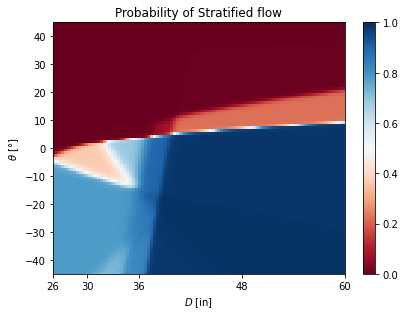

In [ ]:
fig, ax = plt.subplots(1, sharex=True, sharey=True, figsize=(6, 4.5))
im = ax.pcolormesh(Ds/0.0254, angles, stratified.reshape(Ds.shape),
                   vmin=0, vmax=1,
                   cmap='RdBu')
plt.colorbar(im, ax=ax)
ax.set_xlabel('$D$ [in]')
ax.set_ylabel('$\\theta$ [°]')
ax.set_title('Probability of Stratified flow')
ax.set_xticks([26, 30, 36, 48, 60])
plt.tight_layout()

We can also use slices of the previous plot to get probability of stratified flow for constant $\theta$ or $D$. Probability of stratified flow for a constant angle is given below. You can change the index `i` and check how the probability curve changes for different inclinations.

Text(0.5, 0, 'D [in]')

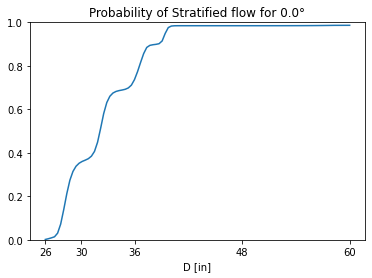

In [ ]:
i = 45
fig, ax = plt.subplots()
stratified = stratified.reshape(Ds.shape)
ax.plot(Ds[i]/0.0254, stratified[i])
ax.set_xticks([26, 30, 36, 48, 60])
ax.set_title(f'Probability of Stratified flow for {angles[i].mean()}°')
ax.set_ylim([0, 1])
ax.set_xlabel('D [in]')

## Part 2 - Selection of $\theta$

Similarly, we can slice the data in a different axis and get the behavior of the stratified probability for a constant diameter. The index `i` can also be changed to show different diameters.

Text(0.5, 0, '$\\theta$ [°]')

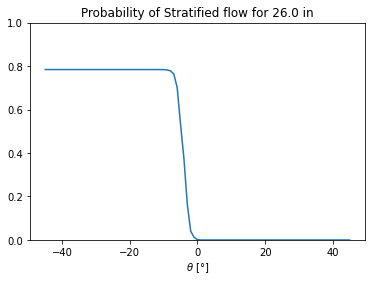

In [ ]:
i = 0
fig, ax = plt.subplots()
ax.plot(angles.T[i], stratified.T[i])
ax.set_title(f'Probability of Stratified flow for {Ds.T[i].mean()/0.0254:.3} in')
ax.set_ylim([0, 1])
ax.set_xlabel('$\\theta$ [°]')

Text(0.5, 0, '$\\theta$ [°]')

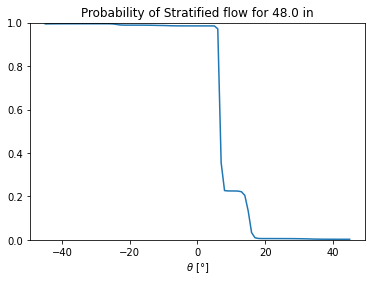

In [ ]:
i = 64
fig, ax = plt.subplots()
ax.plot(angles.T[i], stratified.T[i])
ax.set_title(f'Probability of Stratified flow for {Ds.T[i].mean()/0.0254:.3} in')
ax.set_ylim([0, 1])
ax.set_xlabel('$\\theta$ [°]')

Text(0.5, 0, '$\\theta$ [°]')

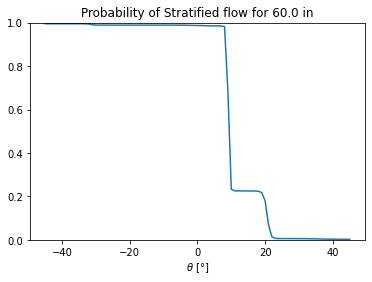

In [ ]:
i = 99
fig, ax = plt.subplots()
ax.plot(angles.T[i], stratified.T[i])
ax.set_title(f'Probability of Stratified flow for {Ds.T[i].mean()/0.0254:.3} in')
ax.set_ylim([0, 1])
ax.set_xlabel('$\\theta$ [°]')

 - Try to answer the questions of the example based on the plots above.
 - Is it risky to select a 26 in diameter with a downward inclination? 
 - How would your answer change if the flow conditions of interest were significantly different than the ones present in the database?
 - Try to plot an operation envelope ($v_{sl}$ vs. $v_{sg}$) where stratified flow is likely to occur (this is similar to what was done in the example for $\theta$ vs. $D$).

# Questions?

If you have any questions, feel free to send me an e-mail at `vik8290@utulsa.edu`.